In [44]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import progressbar
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
data_class1 = np.load('./data_class3/data3_class1.npy')
data_class2 = np.load('./data_class3/data3_class2.npy')
data_class3 = np.load('./data_class3/data3_class3.npy')
data_test1   = np.load('./data_class3/data3_test1.npy')
data_test2   = np.load('./data_class3/data3_test2.npy')
data_test3   = np.load('./data_class3/data3_test3.npy')
data = []
minx, miny, maxx,maxy = find_range(data_class1, data_class2, data_class3, data_test) 
print(minx, miny, maxx, maxy)

-1.09375 299.6875 2501.09375 2505.0


In [31]:
def func_G(x,cov, mean,p=1/3):
    inv_cov = np.linalg.pinv(cov)
    g = -0.5*np.matmul(np.matmul((x-mean),(inv_cov)),((x-mean).T))+0.5*(np.log(np.linalg.det(cov)))+np.log(p)
    if(isinstance(g,np.ndarray)):
        return g.diagonal()
    else:
        return g

In [32]:
def find_mean(data):
    return [np.sum(data[:,0])/data.shape[0],np.sum(data[:,1])/data.shape[0]]

def find_covariance(data, mean):
    a = []
    varx = (np.sum(data[:,0]**2)/data.shape[0])-(mean[0]**2)
    vary = (np.sum(data[:,1]**2)/data.shape[0])-(mean[1]**2)
    varxy = (np.sum(data[:,0]*data[:,1])/data.shape[0])-(mean[0]*mean[1])
    a = [[varx,varxy],[varxy,vary]]
    a = np.array(a)
    
    return a

In [33]:
def get_confusion_mat(classes, il=None,jl=None, kl=None):
    
    lis = []
    if((il != None) and (jl!=None) and (kl!=None)):
        conf_mat = np.full((3,3),1e-10)
        for i in range(data_test1.shape[0]):
            lis.append(0)
        for i in range(data_test2.shape[0]):
            lis.append(1)
        for i in range(data_test3.shape[0]):
            lis.append(2)
        for i in range(len(classes)):
            conf_mat[lis[i]][classes[i]]+=1
        return np.array(conf_mat)
    else:
        conf_mat = np.full((2,2),1e-10)
        if(il==1 and jl==2):
            for i in range(data_test1.shape[0]):
                lis.append(0)
            for i in range(data_test2.shape[0]):
                lis.append(1)
        if(il==1 and jl==3):
            for i in range(data_test1.shape[0]):
                lis.append(0)
            for i in range(data_test3.shape[0]):
                lis.append(1)
        if(il==2 and jl==3):
            for i in range(data_test2.shape[0]):
                lis.append(0)
            for i in range(data_test3.shape[0]):
                lis.append(1)

        for i in range(len(classes)):
            conf_mat[lis[i]][classes[i]]+=1

        return np.array(conf_mat)

In [34]:
def metric(conf_matrix):
    x = conf_matrix.shape[0]
    precision = []
    accuracy = []
    recall = []
    f_measure = []
    total_sum = np.sum(conf_matrix)
    for i in range(x):
        TP = conf_matrix[i][i]
        FN = np.sum(conf_matrix[i,:])-conf_matrix[i][i]
        FP = np.sum(conf_matrix[:,i])-conf_matrix[i][i]
        TN = total_sum-(TP+FP+FN)

        recal = TP/(TP+FN)
        preci = TP/(TP+FP)
        acc = (TP+TN)/(TP+TN+FP+FN)
        
        precision.append(preci)
        recall.append(recal)
        accuracy.append(acc)
        f_measure.append((2*recal*preci)/(recal+preci))
        
    return accuracy,precision,recall,f_measure

In [35]:
def find_range(data1, data2, data3, test):
    
    minx = np.min(data1[:,0])
    minx = min(minx, np.min(data2[:,0]))
    minx = min(minx, np.min(data3[:,0]))
    
    miny = np.min(data1[:,1])
    miny = min(miny, np.min(data2[:,1]))
    miny = min(miny, np.min(data3[:,1]))
    
    maxx = np.max(data1[:,0])
    maxx = max(maxx, np.max(data2[:,0]))
    maxx = max(maxx, np.max(data3[:,0]))
    
    maxy = np.min(data1[:,1])
    maxy = max(maxy, np.max(data2[:,1]))
    maxy = max(maxy, np.max(data3[:,1]))
    scalex = maxx-minx
    scaley = maxy-miny
    return minx-5, miny-5, maxx+5, maxy+5

In [45]:
def pair_plot(dc1, dc2,cov1, cov2, mean1, mean2, il, jl):
    dat_blue = []
    dat_red = []
    dict_={1:'violet',2:'pink',3:'oldlace'}
    dict_2 = {3:'red',1:'blue',2:'green'}
    patch1 = mpatches.Patch(color=dict_[il], label='class{}'.format(il))
    patch2 = mpatches.Patch(color=dict_[jl], label='class{}'.format(jl))
    for i in progressbar.progressbar(np.arange(minx,maxx,1)):
        for j in np.arange(miny,maxy,1):
            data=[]
            data.append([i,j])
            data=np.array(data)
            g1 = func_G(data,cov1,mean1)
            g2 = func_G(data,cov2,mean2)
            if(np.argmax([g1,g2])==0):
                dat_red.append([data[0][0],data[0][1]])
            elif(np.argmax([g1,g2])==1):
                dat_blue.append([data[0][0],data[0][1]])

    dat_blue = np.array(dat_blue)
    dat_red = np.array(dat_red)
    fig, ax = plt.subplots()
#     ax = sns.kdeplot(dc1[:,0], dc1[:,1])
#     ax = sns.kdeplot(dc2[:,0], dc2[:,1])
    ax = plt.scatter(dat_blue[:,0], dat_blue[:,1], s=2, c=dict_[jl])
    ax = plt.scatter(dat_red[:,0], dat_red[:,1], s=2, c=dict_[il])
    ax = plt.legend(handles=[patch2,patch1])
    ax = plt.scatter(dc1[:,0], dc1[:,1], s=2, c=dict_2[il])
    ax = plt.scatter(dc2[:,0], dc2[:,1], s=2, c=dict_2[jl])
    plt.show()
    
    data_test = []
    if(il==1 or jl==1):
        for i in range(data_test1.shape[0]):
            data_test.append([data_test1[i][0],data_test1[i][1]])
    if(il==2 or jl==2):
        for i in range(data_test2.shape[0]):
            data_test.append([data_test2[i][0],data_test2[i][1]])
    if(il==3 or jl==3):
        for i in range(data_test3.shape[0]):
            data_test.append([data_test3[i][0],data_test3[i][1]])
        
    data_test = np.array(data_test)
    g1 = func_G(data_test, cov1, mean1)
    g2 = func_G(data_test, cov2, mean2)


    classes = []
    for i in range(data_test.shape[0]):
        classes.append(np.argmax([g1[i],g2[i]]))

    conf_mat = get_confusion_mat(classes, il,jl)
    print("Confusion Matrix")
    print(conf_mat)
    temp = np.array(metric(conf_mat))
    print("Accuracy: ",temp[0,:])
    print("Precision: ",temp[1,:])
    print("Recall: ",temp[2,:])
    print("F-Measure: ",temp[3,:])
    print("Mean F-Measure: ",np.mean(temp[3,:]))

def total_plot(cov1, cov2, cov3, mean1, mean2, mean3):
    
    dat_blue = []
    dat_red = []
    dat_green = []
    violet_patch = mpatches.Patch(color='violet', label='class1')
    pink_patch = mpatches.Patch(color='pink', label='class2')
    oldlace_patch = mpatches.Patch(color='oldlace', label='class3')
    for i in np.arange(minx,maxx,1):
        for j in np.arange(miny,maxy,1):
            data=[]
            data.append([i,j])
            data=np.array(data)
            g1 = func_G(data,cov1,mean1)
            g2 = func_G(data,cov2,mean2)
            g3 = func_G(data,cov3,mean3)
            if(np.argmax([g1,g2,g3])==0):
                dat_red.append([data[0][0],data[0][1]])
            elif(np.argmax([g1,g2,g3])==1):
                dat_blue.append([data[0][0],data[0][1]])
            elif(np.argmax([g1,g2,g3])==2):
                dat_green.append([data[0][0],data[0][1]])

    dat_blue = np.array(dat_blue)
    dat_red = np.array(dat_red)
    dat_green = np.array(dat_green)
    fig, ax = plt.subplots()
#     ax = sns.kdeplot(data_class1[:,0], data_class1[:,1])
#     ax = sns.kdeplot(data_class2[:,0], data_class2[:,1])
#     ax = sns.kdeplot(data_class3[:,0], data_class3[:,1])
    ax = plt.scatter(dat_blue[:,0], dat_blue[:,1], s=2, c='pink')
    ax = plt.scatter(dat_red[:,0], dat_red[:,1], s=2, c='violet')
    ax = plt.scatter(dat_green[:,0], dat_green[:,1], s=2, c='oldlace')
    ax = plt.legend(handles=[violet_patch,pink_patch,oldlace_patch])
    ax = plt.scatter(data_class1[:,0], data_class1[:,1], s=2, c='blue')
    ax = plt.scatter(data_class2[:,0], data_class2[:,1], s=2, c='green')
    ax = plt.scatter(data_class3[:,0], data_class3[:,1], s=2, c='red')
    plt.show()
    
    data_test = []
    for i in range(data_test1.shape[0]):
        data_test.append([data_test1[i][0],data_test1[i][1]])
    for i in range(data_test2.shape[0]):
        data_test.append([data_test2[i][0],data_test2[i][1]])
    for i in range(data_test3.shape[0]):
        data_test.append([data_test3[i][0],data_test3[i][1]])
        
    data_test = np.array(data_test)
    
    g1 = func_G(data_test, cov1, mean1)
    g2 = func_G(data_test, cov2, mean2)
    g3 = func_G(data_test, cov3, mean3)


    classes = []
    for i in range(data_test.shape[0]):
        classes.append(np.argmax([g1[i],g2[i],g3[i]]))

    conf_mat = get_confusion_mat(classes,1,2,3)
    print(conf_mat)
    temp = np.array(metric(conf_mat))
    print("Accuracy: ",temp[0,:])
    print("Precision: ",temp[1,:])
    print("Recall: ",temp[2,:])
    print("F-Measure: ",temp[3,:])
    print("Mean F-Measure: ",np.mean(temp[3,:]))


In [46]:
data_test = []
for i in range(data_test1.shape[0]):
    data_test.append([data_test1[i][0],data_test1[i][1]])
for i in range(data_test2.shape[0]):
    data_test.append([data_test2[i][0],data_test2[i][1]])
for i in range(data_test3.shape[0]):
    data_test.append([data_test3[i][0],data_test3[i][1]])

data_test = np.array(data_test)

In [47]:
mean1 = find_mean(data_class1)
mean2 = find_mean(data_class2)
mean3 = find_mean(data_class3)

cov1 = find_covariance(data_class1, mean1)
cov2 = find_covariance(data_class2, mean2)
cov3 = find_covariance(data_class3, mean3)

100% (2503 of 2503) |####################| Elapsed Time: 0:17:38 Time:  0:17:38


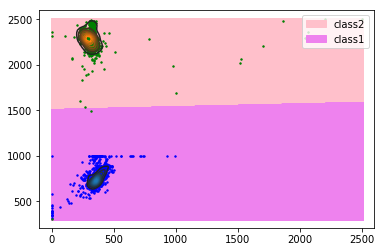

N/A% (0 of 2503) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Confusion Matrix
[[  6.22000000e+02   1.00000000e-10]
 [  1.00000000e-10   5.97000000e+02]]
Accuracy:  [ 1.  1.]
Precision:  [ 1.  1.]
Recall:  [ 1.  1.]
F-Measure:  [ 1.  1.]
Mean F-Measure:  1.0


  8% (212 of 2503) |#                    | Elapsed Time: 0:01:26 ETA:   0:16:04

KeyboardInterrupt: 

In [48]:
#Case1: When all class have same diagonal covariance matrix
var_avg = (cov1[0][0]+cov2[0][0]+cov3[0][0]+cov1[1][1]+cov2[1][1]+cov3[1][1])/6
cov_new = [[var_avg,0],
           [0,var_avg]]


pair_plot(data_class1, data_class2, cov_new, cov_new, mean1, mean2,1,2)
pair_plot(data_class1, data_class3, cov_new, cov_new, mean1, mean3,1,3)
pair_plot(data_class2, data_class3, cov_new, cov_new, mean2, mean3,2,3)

total_plot(cov_new, cov_new, cov_new, mean1, mean2, mean3)

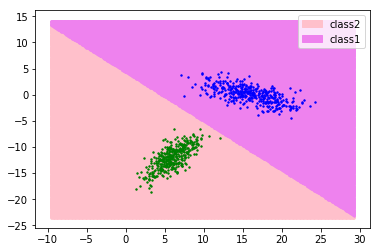

Confusion Matrix
[[  1.25000000e+02   1.00000000e-10]
 [  1.00000000e-10   1.25000000e+02]]
Accuracy:  [ 1.  1.]
Precision:  [ 1.  1.]
Recall:  [ 1.  1.]
F-Measure:  [ 1.  1.]
Mean F-Measure:  0.999999999999


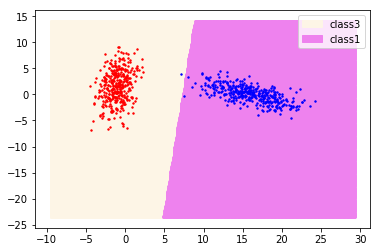

Confusion Matrix
[[  1.24000000e+02   1.00000000e+00]
 [  1.00000000e-10   1.25000000e+02]]
Accuracy:  [ 0.996  0.996]
Precision:  [ 1.          0.99206349]
Recall:  [ 0.992  1.   ]
F-Measure:  [ 0.99598394  0.99601594]
Mean F-Measure:  0.995999935998


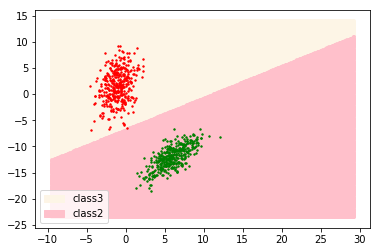

Confusion Matrix
[[  1.25000000e+02   1.00000000e-10]
 [  1.00000000e-10   1.25000000e+02]]
Accuracy:  [ 1.  1.]
Precision:  [ 1.  1.]
Recall:  [ 1.  1.]
F-Measure:  [ 1.  1.]
Mean F-Measure:  0.999999999999


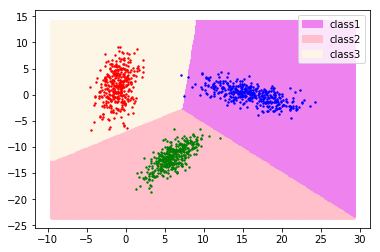

[[  1.24000000e+02   1.00000000e-10   1.00000000e+00]
 [  1.00000000e-10   1.25000000e+02   1.00000000e-10]
 [  1.00000000e-10   1.00000000e-10   1.25000000e+02]]
Accuracy:  [ 0.99733333  1.          0.99733333]
Precision:  [ 1.          1.          0.99206349]
Recall:  [ 0.992  1.     1.   ]
F-Measure:  [ 0.99598394  1.          0.99601594]
Mean F-Measure:  0.997333290664


In [598]:
#Case2: When all class have same covariance matrix

cov_new = np.add(np.add(cov1,cov2),cov3)/3

pair_plot(data_class1, data_class2, cov_new, cov_new, mean1, mean2,1,2)
pair_plot(data_class1, data_class3, cov_new, cov_new, mean1, mean3,1,3)
pair_plot(data_class2, data_class3, cov_new, cov_new, mean2, mean3,2,3)

total_plot(cov_new, cov_new, cov_new, mean1, mean2, mean3)

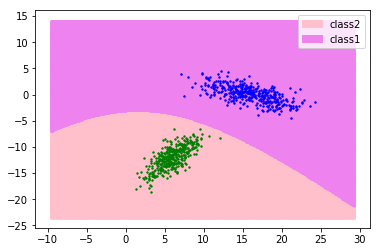

Confusion Matrix
[[  1.25000000e+02   1.00000000e-10]
 [  1.00000000e-10   1.25000000e+02]]
Accuracy:  [ 1.  1.]
Precision:  [ 1.  1.]
Recall:  [ 1.  1.]
F-Measure:  [ 1.  1.]
Mean F-Measure:  0.999999999999


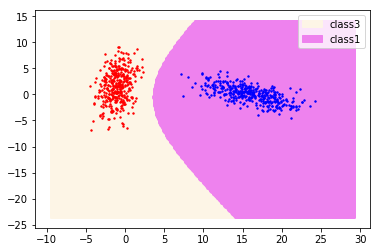

Confusion Matrix
[[  1.25000000e+02   1.00000000e-10]
 [  1.00000000e-10   1.25000000e+02]]
Accuracy:  [ 1.  1.]
Precision:  [ 1.  1.]
Recall:  [ 1.  1.]
F-Measure:  [ 1.  1.]
Mean F-Measure:  0.999999999999


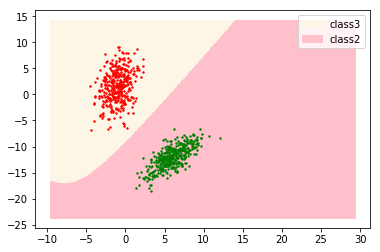

Confusion Matrix
[[  1.25000000e+02   1.00000000e-10]
 [  1.00000000e-10   1.25000000e+02]]
Accuracy:  [ 1.  1.]
Precision:  [ 1.  1.]
Recall:  [ 1.  1.]
F-Measure:  [ 1.  1.]
Mean F-Measure:  0.999999999999


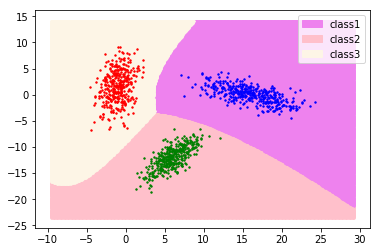

[[  1.25000000e+02   1.00000000e-10   1.00000000e-10]
 [  1.00000000e-10   1.25000000e+02   1.00000000e-10]
 [  1.00000000e-10   1.00000000e-10   1.25000000e+02]]
Accuracy:  [ 1.  1.  1.]
Precision:  [ 1.  1.  1.]
Recall:  [ 1.  1.  1.]
F-Measure:  [ 1.  1.  1.]
Mean F-Measure:  0.999999999998


In [599]:
#Case3: When all class have different covariance matrix but diagonal
cov1_new = np.copy(cov1)
cov2_new = np.copy(cov2)
cov3_new = np.copy(cov3)
cov1_new[0][1]=0
cov1_new[1][0]=0
cov2_new[0][1]=0
cov2_new[1][0]=0
cov3_new[0][1]=0
cov3_new[1][0]=0


pair_plot(data_class1, data_class2, cov1_new, cov2_new, mean1, mean2,1,2)
pair_plot(data_class1, data_class3, cov1_new, cov3_new, mean1, mean3,1,3)
pair_plot(data_class2, data_class3, cov2_new, cov3_new, mean2, mean3,2,3)

total_plot(cov1_new, cov2_new, cov3_new, mean1, mean2, mean3)

In [ ]:
#Case4: When all class have different covariance matrix

pair_plot(data_class1, data_class2, cov1, cov2, mean1, mean2,1,2)
pair_plot(data_class1, data_class3, cov1, cov3, mean1, mean3,1,3)
pair_plot(data_class2, data_class3, cov2, cov3, mean2, mean3,2,3)

total_plot(cov1, cov2, cov3, mean1, mean2, mean3)

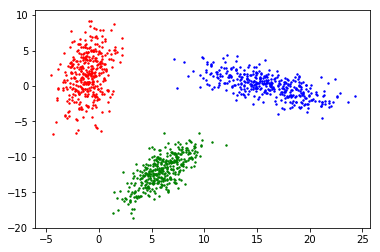

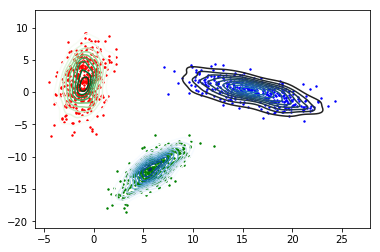

In [15]:
minx , miny, maxx, maxy = find_range(data_class1, data_class2, data_class3, data_test)
plt.scatter(data_class1[:,0], data_class1[:,1], s=2, c='blue')
plt.scatter(data_class2[:,0], data_class2[:,1], s=2, c='green')
plt.scatter(data_class3[:,0], data_class3[:,1], s=2, c='red')
plt.show()

import pandas as pd
df1 = pd.DataFrame(data_class1, columns=["x", "y"])
df2 = pd.DataFrame(data_class2, columns=["x", "y"])
df3 = pd.DataFrame(data_class3, columns=["x", "y"])

fig, ax = plt.subplots()
ax = sns.kdeplot(data_class1[:,0], data_class1[:,1])
ax = sns.kdeplot(data_class2[:,0], data_class2[:,1],cmap="Blues", shade=False, shade_lowest=False)
ax = sns.kdeplot(data_class3[:,0], data_class3[:,1],cmap="Greens", shade=False, shade_lowest=False)
ax = plt.scatter(data_class1[:,0], data_class1[:,1], s=2, c='blue')
ax = plt.scatter(data_class2[:,0], data_class2[:,1], s=2, c='green')
ax = plt.scatter(data_class3[:,0], data_class3[:,1], s=2, c='red')
plt.show()